In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

/Users/takayoshi-endo/.anyenv/envs/pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
merck_train_path = './kaggle-data/Merck/TrainingSet/ACT10_competition_training.csv'
merck_test_path = './kaggle-data/Merck/TestSet/ACT10_competition_test.csv'

In [3]:
train = pd.read_csv(merck_train_path)
test = pd.read_csv(merck_test_path)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.isnull().any()
test.isnull().any()

In [ ]:
train['Act'].hist()

In [ ]:
train['D_3'].hist()

In [ ]:
train['D_5'].hist()

In [ ]:
train['D_6'].hist()

### 次元削減

In [4]:
from sklearn import (manifold, decomposition, ensemble, discriminant_analysis, random_projection)

In [5]:
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)

In [6]:
train.tail()

,MOLECULE,Act,D_3,D_5,D_6,D_12,D_15,D_16,D_24,D_36,...,D_11031,D_11033,D_11034,D_11045,D_11047,D_11050,D_11051,D_11053,D_11056,D_11070
11146,ACT10_M_146735,8.2867,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11147,ACT10_M_146736,8.1683,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11148,ACT10_M_146737,9.3716,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11149,ACT10_M_146738,8.4805,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11150,ACT10_M_146739,8.6705,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train = pd.read_csv(merck_train_path, dtype=None, delimiter=',')
test = pd.read_csv(merck_test_path, dtype=None, delimiter=',')

In [ ]:
train.dtypes

In [ ]:
test.dtypes

In [11]:
train = train.drop('Act', axis=1)

In [12]:
train = train.drop('MOLECULE', axis=1)

In [ ]:
train.dtypes

## PCA 主成分分析
固有値展開して、固有値が大きいものから固有ベクトルを基底として投影する手法

In [8]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
merck_pca = pca.fit_transform(train)

In [15]:
merck_pca

array([[ 19.97364656,  -5.60633097],
       [-49.33162577, -27.8625661 ],
       [-34.17664411, -30.12517441],
       ..., 
       [ -6.72313471,   7.59220022],
       [ -2.59559036,  11.97578016],
       [ -1.22919758,  17.62143991]])

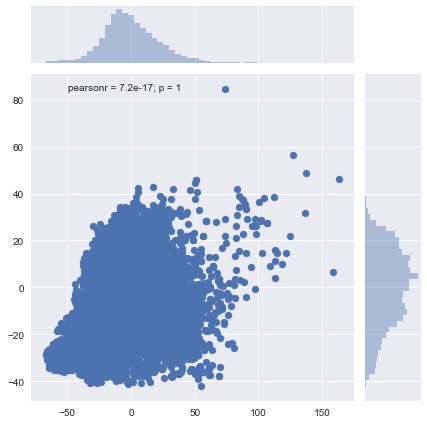

In [16]:
plt.figure(figsize=(16,16))
sns.jointplot(x = merck_pca[:,0], y = merck_pca[:,1]) 

In [17]:
merck_pca.shape

(11151, 2)

In [18]:
df = pd.DataFrame(merck_pca, columns = ['1次元', '2次元'])
df

,1次元,2次元
0,19.973647,-5.606331
1,-49.331626,-27.862566
2,-34.176644,-30.125174
3,-41.258206,-34.672401
4,-56.369038,-23.700590
5,-19.812443,4.753569
6,-13.716007,-4.731421
7,-27.437383,-5.366582
8,-64.332204,-29.521677
9,-24.754172,-0.874872


In [ ]:
sns.pairplot(df, hue= '1次元')

## 累積寄与率

In [23]:
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率: [ 0.24506509  0.123622  ]
累積寄与率: 0.3686870916197148


In [37]:
# 25次元が80%
pca_dim = []
pca_ratio = []
for i in range(25):
    pca = PCA(n_components=i+1)
    pca.fit_transform(train)
    print('{0}次元の寄与率: {1}'.format(i+1, pca.explained_variance_ratio_))
    print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))
    pca_ratio.append(sum(pca.explained_variance_ratio_))
    name = 'PCA' + str(i+1)
    pca_dim.append(name)
print('pca_dim : {0}'.format(pca_dim))
print('pca_ratio : {0}'.format(pca_ratio))

array([[ 19.97364658],
       [-49.33162578],
       [-34.17664411],
       ..., 
       [ -6.72313473],
       [ -2.59559039],
       [ -1.2291976 ]])

1次元の寄与率: [ 0.24506509]
累積寄与率: 0.2450650927736044


array([[ 19.97364658,  -5.6063326 ],
       [-49.33162578, -27.86256559],
       [-34.17664412, -30.1251738 ],
       ..., 
       [ -6.72313471,   7.59220118],
       [ -2.59559037,  11.97578132],
       [ -1.22919758,  17.62144073]])

2次元の寄与率: [ 0.24506509  0.123622  ]
累積寄与率: 0.368687091619717


array([[ 19.97364658,  -5.60633222,  23.03607371],
       [-49.33162578, -27.86256556,   2.98090521],
       [-34.17664412, -30.12517347,  -3.75201145],
       ..., 
       [ -6.72313471,   7.59220146,  -7.05658584],
       [ -2.59559037,  11.97578116,  -5.85156926],
       [ -1.22919758,  17.62144048,  -9.5827422 ]])

3次元の寄与率: [ 0.24506509  0.123622    0.0946918 ]
累積寄与率: 0.4633788900816614


array([[ 19.97364658,  -5.60633284,  23.03607342,   2.06676697],
       [-49.33162578, -27.86256556,   2.98090425, -11.67327454],
       [-34.17664412, -30.12517357,  -3.752013  ,  -7.20162953],
       ..., 
       [ -6.72313471,   7.59220141,  -7.05658562,  -0.66106564],
       [ -2.59559037,  11.97578121,  -5.85156913,   5.40798908],
       [ -1.22919758,  17.62144056,  -9.58274214,   4.52072089]])

4次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826 ]
累積寄与率: 0.5252614881933907


array([[ 19.97364658,  -5.6063326 ,  23.03607352,   2.06676212,
         16.60392778],
       [-49.33162578, -27.86256563,   2.98090466, -11.67326532,
         -0.81331304],
       [-34.17664412, -30.12517364,  -3.75201281,  -7.20162518,   4.0219803 ],
       ..., 
       [ -6.72313471,   7.59220149,  -7.05658588,  -0.66106745,
          0.57452999],
       [ -2.59559037,  11.9757812 ,  -5.85156916,   5.40799234,  -1.3833032 ],
       [ -1.22919759,  17.62144039,  -9.58274182,   4.52072817,
          3.89523509]])

5次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502]
累積寄与率: 0.562536506555126


array([[ 19.97364658,  -5.60633258,  23.03607466,   2.06675435,
         16.60380175, -10.59104181],
       [-49.33162578, -27.86256559,   2.98090435, -11.6732691 ,
         -0.81337416,  -5.97306715],
       [-34.17664412, -30.12517361,  -3.75201296,  -7.20162613,
          4.02195337,  -3.8163515 ],
       ..., 
       [ -6.72313471,   7.59220144,  -7.05658553,  -0.66106191,
          0.57446995,  -2.3201174 ],
       [ -2.59559037,  11.97578118,  -5.85156922,   5.40799581,
         -1.38338513,  -3.57332594],
       [ -1.22919758,  17.62144048,  -9.58274219,   4.52072323,
          3.89511858,  -2.79198159]])

6次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567]
累積寄与率: 0.5925321807526501


array([[ 19.97364658,  -5.6063327 ,  23.03607372, ...,  16.60408743,
        -10.58935054,  -4.49594584],
       [-49.33162578, -27.86256558,   2.98090443, ...,  -0.81337012,
         -5.97309065,   4.94763436],
       [-34.17664412, -30.12517359,  -3.75201291, ...,   4.02193026,
         -3.81633017,   5.63794327],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658564, ...,   0.5745039 ,
         -2.31940656,   2.39158419],
       [ -2.59559037,  11.97578122,  -5.85156911, ...,  -1.38338962,
         -3.57302413,   4.61746547],
       [ -1.22919758,  17.62144051,  -9.58274212, ...,   3.89510615,
         -2.79198273,   5.49063769]])

7次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417]
累積寄与率: 0.6209863482069198


array([[ 19.97364658,  -5.6063327 ,  23.03607367, ..., -10.58942603,
         -4.49586139,   7.35416574],
       [-49.33162578, -27.86256558,   2.98090443, ...,  -5.97310937,
          4.94758676,  -0.99566604],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,  -3.8163014 ,
          5.63780503,   1.62970474],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658562, ...,  -2.31939191,
          2.39181148,   8.88514395],
       [ -2.59559037,  11.97578121,  -5.85156912, ...,  -3.57293293,
          4.61765278,  10.14939325],
       [ -1.22919758,  17.62144051,  -9.5827421 , ...,  -2.79187316,
          5.4905168 ,  10.4270848 ]])

8次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787]
累積寄与率: 0.6419242206627858


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,  -4.49587048,
          7.35333952, -12.25165742],
       [-49.33162578, -27.86256558,   2.98090442, ...,   4.94754893,
         -0.99563288,   5.76616261],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,   5.63781845,
          1.62995867,   5.49198702],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658564, ...,   2.39185506,
          8.8863315 ,  -0.1471249 ],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,   4.61770315,
         10.15039751,   1.9603146 ],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,   5.4905032 ,
         10.42780948,   1.07197764]])

9次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935413]
累積寄与率: 0.6612783556833003


array([[ 19.97364658,  -5.60633271,  23.03607371, ...,   7.3529964 ,
        -12.25185859,  -5.71289947],
       [-49.33162578, -27.86256558,   2.98090441, ...,  -0.99596243,
          5.76307293,   2.85475173],
       [-34.17664412, -30.12517359,  -3.75201291, ...,   1.62969601,
          5.49031804,   1.22427657],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,   8.88621439,
         -0.14729235, -11.1642793 ],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,  10.15052401,
          1.96097986, -15.23322877],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  10.42794782,
          1.07272972, -13.54570634]])

10次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935413  0.01838325]
累積寄与率: 0.6796616084783117


array([[  1.99736466e+01,  -5.60633271e+00,   2.30360737e+01, ...,
         -1.22522136e+01,  -5.71242464e+00,  -4.87479620e-02],
       [ -4.93316258e+01,  -2.78625656e+01,   2.98090442e+00, ...,
          5.76439676e+00,   2.85527813e+00,  -3.37129505e+00],
       [ -3.41766441e+01,  -3.01251736e+01,  -3.75201290e+00, ...,
          5.49108056e+00,   1.22484772e+00,   6.97522259e+00],
       ..., 
       [ -6.72313471e+00,   7.59220145e+00,  -7.05658564e+00, ...,
         -1.46513246e-01,  -1.11642799e+01,  -5.79850699e-01],
       [ -2.59559037e+00,   1.19757812e+01,  -5.85156913e+00, ...,
          1.96085741e+00,  -1.52332564e+01,  -1.53614133e+00],
       [ -1.22919758e+00,   1.76214405e+01,  -9.58274211e+00, ...,
          1.07246148e+00,  -1.35458919e+01,  -1.26902007e+00]])

11次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383]
累積寄与率: 0.6945954398401181


array([[  1.99736466e+01,  -5.60633271e+00,   2.30360737e+01, ...,
         -5.71195486e+00,  -4.88668975e-02,   1.29359688e+00],
       [ -4.93316258e+01,  -2.78625656e+01,   2.98090442e+00, ...,
          2.85517383e+00,  -3.37308096e+00,  -8.18151507e-01],
       [ -3.41766441e+01,  -3.01251736e+01,  -3.75201290e+00, ...,
          1.22462536e+00,   6.97331377e+00,   1.52508018e+00],
       ..., 
       [ -6.72313471e+00,   7.59220145e+00,  -7.05658565e+00, ...,
         -1.11646699e+01,  -5.75901555e-01,  -6.87494997e+00],
       [ -2.59559037e+00,   1.19757812e+01,  -5.85156913e+00, ...,
         -1.52336221e+01,  -1.53429062e+00,  -9.42344224e+00],
       [ -1.22919758e+00,   1.76214405e+01,  -9.58274211e+00, ...,
         -1.35463700e+01,  -1.26519795e+00,  -8.87803374e+00]])

12次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328]
累積寄与率: 0.7084987208896611


array([[  1.99736466e+01,  -5.60633271e+00,   2.30360737e+01, ...,
         -4.68680940e-02,   1.29068180e+00,   4.72588117e+00],
       [ -4.93316258e+01,  -2.78625656e+01,   2.98090442e+00, ...,
         -3.36969974e+00,  -8.16437563e-01,  -1.29808857e+00],
       [ -3.41766441e+01,  -3.01251736e+01,  -3.75201290e+00, ...,
          6.97565190e+00,   1.52543721e+00,  -8.65624475e-01],
       ..., 
       [ -6.72313471e+00,   7.59220145e+00,  -7.05658564e+00, ...,
         -5.77648773e-01,  -6.87538746e+00,  -6.02120424e+00],
       [ -2.59559037e+00,   1.19757812e+01,  -5.85156913e+00, ...,
         -1.53644094e+00,  -9.42335649e+00,  -4.62311864e+00],
       [ -1.22919758e+00,   1.76214405e+01,  -9.58274211e+00, ...,
         -1.26862196e+00,  -8.87695016e+00,  -2.69681505e+00]])

13次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897]
累積寄与率: 0.7197576880417602


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,   1.29105841,
          4.72477348,  11.96451084],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -0.81629551,
         -1.3050634 ,  -5.98657126],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,   1.52602957,
         -0.86775563,  -7.11811078],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,  -6.87444756,
         -6.02149493,  -3.47186397],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,  -9.42169448,
         -4.62709373,  -3.56023055],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -8.87519524,
         -2.70305285,  -0.48600905]])

14次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125894  0.01104704]
累積寄与率: 0.7308046927400746


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,   4.73352612,
         11.97230218, -11.13686249],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -1.30376465,
         -5.97582986,  -0.40190217],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,  -0.86841854,
         -7.10427751,  -0.97275401],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,  -6.02271988,
         -3.4799356 ,  -2.55122725],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,  -4.62309279,
         -3.57250626,  -0.2356076 ],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -2.69558372,
         -0.50490768,  -0.28714433]])

15次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125896  0.01104708  0.00960474]
累積寄与率: 0.7404095066879897


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,  11.97306436,
        -11.13461738,   6.98042761],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -5.98396324,
         -0.39670442,  -3.57043071],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,  -7.11131545,
         -0.96896461,  -3.45750863],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,  -3.47399022,
         -2.55005952,   0.96482982],
       [ -2.59559037,  11.97578122,  -5.85156914, ...,  -3.56630398,
         -0.23715902,  -2.03061626],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -0.49479828,
         -0.2986773 ,  -6.02123115]])

16次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104707  0.00960468  0.00900665]
累積寄与率: 0.749416088031318


array([[ 19.97364658,  -5.60633271,  23.0360737 , ..., -11.12965236,
          7.00667266,  -2.61812656],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -0.3994575 ,
         -3.57525508,  -0.43225554],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,  -0.97118089,
         -3.45732585,   0.90533218],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,  -2.54831988,
          0.95563149,   2.06959817],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,  -0.23283419,
         -2.03193301,   2.87488421],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -0.28786353,
         -6.02928727,   3.87492846]])

17次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960475  0.00900665  0.00849246]
累積寄与率: 0.7579086277266581


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,   7.00267171,
         -2.64707216,  -0.45533981],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -3.57495283,
         -0.41934001,   1.29049914],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,  -3.4584051 ,
          0.90225558,   0.15569946],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,   0.96353193,
          2.06875996,   2.31093855],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,  -2.03025289,
          2.87708317,   3.53576291],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -6.02796498,
          3.89149674,   1.16128056]])

18次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960474  0.00900664  0.00849247  0.00761199]
累積寄与率: 0.7655206104608806


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,  -2.62056697,
         -0.54176811,  -1.25651944],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -0.4147927 ,
          1.3473835 ,   0.69786453],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,   0.91149844,
          0.24675328,  -0.23734664],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,   2.06555514,
          2.25026795,  -2.52794243],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,   2.8747641 ,
          3.5241892 ,  -0.65068687],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,   3.87869165,
          1.09489554,   0.41518354]])

19次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960474  0.00900663  0.0084925   0.00761264
  0.00730412]
累積寄与率: 0.7728254019225003


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,  -0.55721221,
         -1.26228141,  -4.37856903],
       [-49.33162578, -27.86256558,   2.98090442, ...,   1.34263869,
          0.68959382,  -0.09737153],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,   0.24239336,
         -0.25585604,   0.17466426],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,   2.25213693,
         -2.5224817 ,   2.30460655],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,   3.52611129,
         -0.65835284,   1.68791198],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,   1.0958288 ,
          0.43315281,   0.36432803]])

20次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960475  0.00900665  0.00849251  0.00761263
  0.00730411  0.00611084]
累積寄与率: 0.7789362671344527


array([[  1.99736466e+01,  -5.60633271e+00,   2.30360737e+01, ...,
         -1.20423039e+00,  -4.34677998e+00,   5.04721055e-01],
       [ -4.93316258e+01,  -2.78625656e+01,   2.98090442e+00, ...,
          6.74664852e-01,  -1.20458717e-01,  -2.64171883e+00],
       [ -3.41766441e+01,  -3.01251736e+01,  -3.75201290e+00, ...,
         -2.51978400e-01,   1.87327758e-01,   9.53853851e-03],
       ..., 
       [ -6.72313471e+00,   7.59220145e+00,  -7.05658565e+00, ...,
         -2.51729065e+00,   2.32158658e+00,  -4.00721879e+00],
       [ -2.59559037e+00,   1.19757812e+01,  -5.85156913e+00, ...,
         -6.46455221e-01,   1.69564613e+00,   4.82015176e-01],
       [ -1.22919758e+00,   1.76214405e+01,  -9.58274211e+00, ...,
          4.25937939e-01,   3.36061872e-01,  -5.29574800e-01]])

21次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960475  0.00900665  0.00849251  0.00761263
  0.00730417  0.00611099  0.00547203]
累積寄与率: 0.784408512112453


array([[  1.99736466e+01,  -5.60633271e+00,   2.30360737e+01, ...,
         -4.48832901e+00,   5.03625974e-01,   8.93403738e-01],
       [ -4.93316258e+01,  -2.78625656e+01,   2.98090442e+00, ...,
         -1.04832637e-01,  -2.52962462e+00,   1.28596091e+00],
       [ -3.41766441e+01,  -3.01251736e+01,  -3.75201290e+00, ...,
          1.08378596e-01,   4.33415871e-03,   8.30419175e-01],
       ..., 
       [ -6.72313471e+00,   7.59220145e+00,  -7.05658565e+00, ...,
          2.30701721e+00,  -4.11558124e+00,  -1.90189645e+00],
       [ -2.59559037e+00,   1.19757812e+01,  -5.85156913e+00, ...,
          1.70483620e+00,   4.07304822e-01,  -1.04776642e+00],
       [ -1.22919758e+00,   1.76214405e+01,  -9.58274211e+00, ...,
          3.88825224e-01,  -6.28612255e-01,  -2.64062737e+00]])

22次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960475  0.00900665  0.0084925   0.00761262
  0.00730417  0.00610964  0.00547236  0.00543046]
累積寄与率: 0.7898379222560529


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,   0.45829083,
          0.60027001,   2.16473621],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -2.51389858,
          1.35595205,  -3.44931664],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,   0.0720871 ,
          0.79015372,  -2.17942013],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,  -4.08851728,
         -2.00154566,  -3.70839092],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,   0.44324773,
         -1.0351059 ,  -1.53158908],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -0.58648676,
         -2.60123682,  -1.70789577]])

23次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960475  0.00900665  0.00849251  0.00761263
  0.0073042   0.0061104   0.00547269  0.00543224  0.0050869 ]
累積寄与率: 0.7949277446109007


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,   0.59953682,
          2.60150946,  -1.70471003],
       [-49.33162578, -27.86256558,   2.98090442, ...,   1.2977832 ,
         -3.74251852,  -2.55841002],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,   0.77489181,
         -2.40890003,  -2.37367897],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,  -1.98800803,
         -3.71284764,   0.48990092],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,  -1.02797978,
         -1.56267907,   2.11590121],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -2.57697513,
         -1.72237202,   3.64603035]])

24次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960475  0.00900665  0.00849251  0.00761263
  0.0073042   0.00611108  0.0054727   0.00543229  0.00508936  0.00470364]
累積寄与率: 0.7996345861285087


array([[ 19.97364658,  -5.60633271,  23.0360737 , ...,   2.69330058,
         -1.87631035,   3.80485519],
       [-49.33162578, -27.86256558,   2.98090442, ...,  -3.7612022 ,
         -2.46361656,  -3.33545011],
       [-34.17664412, -30.12517359,  -3.7520129 , ...,  -2.43031676,
         -2.32725452,  -1.33920485],
       ..., 
       [ -6.72313471,   7.59220145,  -7.05658565, ...,  -3.78973428,
          0.5022701 ,   1.21643699],
       [ -2.59559037,  11.97578122,  -5.85156913, ...,  -1.61860467,
          1.94867126,  -1.03389298],
       [ -1.22919758,  17.62144051,  -9.58274211, ...,  -1.78082473,
          3.52619384,  -1.24699039]])

25次元の寄与率: [ 0.24506509  0.123622    0.0946918   0.0618826   0.03727502  0.02999567
  0.02845417  0.02093787  0.01935414  0.01838325  0.01493383  0.01390328
  0.01125897  0.01104708  0.00960475  0.00900665  0.00849251  0.00761264
  0.0073042   0.00611109  0.00547273  0.00543233  0.00508896  0.00470794
  0.00457064]
累積寄与率: 0.8042092160913188
pca_dim : ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 'PCA25']
pca_ratio : [0.24506509277360439, 0.36868709161971702, 0.46337889008166139, 0.52526148819339069, 0.56253650655512599, 0.59253218075265013, 0.62098634820691978, 0.64192422066278576, 0.66127835568330029, 0.6796616084783117, 0.69459543984011807, 0.70849872088966115, 0.71975768804176021, 0.73080469274007465, 0.74040950668798966, 0.74941608803131798, 0.75790862772665812, 0.7655206104608806, 0.77282540192250027, 0.77893626713445274, 

## スクリープロット

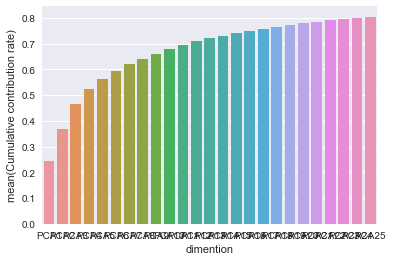

In [42]:
# https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
screeplot = pd.DataFrame({'dimention': pca_dim, 'Cumulative contribution rate': pca_ratio})
sns.barplot(x='dimention', y='Cumulative contribution rate', data = screeplot)

## カイゼル基準

In [ ]:
sns.pairplot(df, hue= '1次元')

## NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
merck_nmf = nmf.fit_transform(train)

In [ ]:
plt.figure(figsize=(16,16))
sns.jointplot(x = merck_nmf[:,0], y = merck_nmf[:,1]) 

## kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=10)

In [ ]:
merck_kernel_pca = kernel_pca.fit_transform(train)

In [ ]:
plt.figure(figsize=(16,16))
sns.jointplot(x = merck_kernel_pca[:,0], y = merck_kernel_pca[:,1]) 

## Isomap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
isomap = Isomap(n_neighbors=8, n_components=2)

In [ ]:
merck_isomap = isomap.fit_transform(train)

In [ ]:
plt.figure(figsize=(16,16))
sns.jointplot(x = merck_isomap[:,0], y = merck_isomap[:,1]) 

## Random Projection

M次元のデータをマッピング可能なN次元へと写像する行列Rの要素を乱数で設定する

In [ ]:
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)

In [ ]:
merck_rp = rp.fit_transform(train)

In [ ]:
plt.figure(figsize=(16,16))
sns.jointplot(x = merck_rp[:,0], y = merck_rp[:,1])

## SVD 特異値分解(データ正規化)

In [ ]:
svd = decomposition.TruncatedSVD(n_components=2)

In [ ]:
merck_svd = svd.fit_transform(train)

In [ ]:
plt.figure(figsize=(16,16))
sns.jointplot(x = merck_svd[:,0], y = merck_svd[:,1])

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

In [ ]:
merck_tsne = tsne.fit_transform(train)

In [ ]:
plt.figure(figsize=(16,16))
sns.jointplot(x = merck_tsne[:,0], y = merck_tsne[:,1])

In [ ]:
train.shape

In [ ]:
# 5790特徴量